The entropy of a Gaussian variable only depends on its variance. <br>

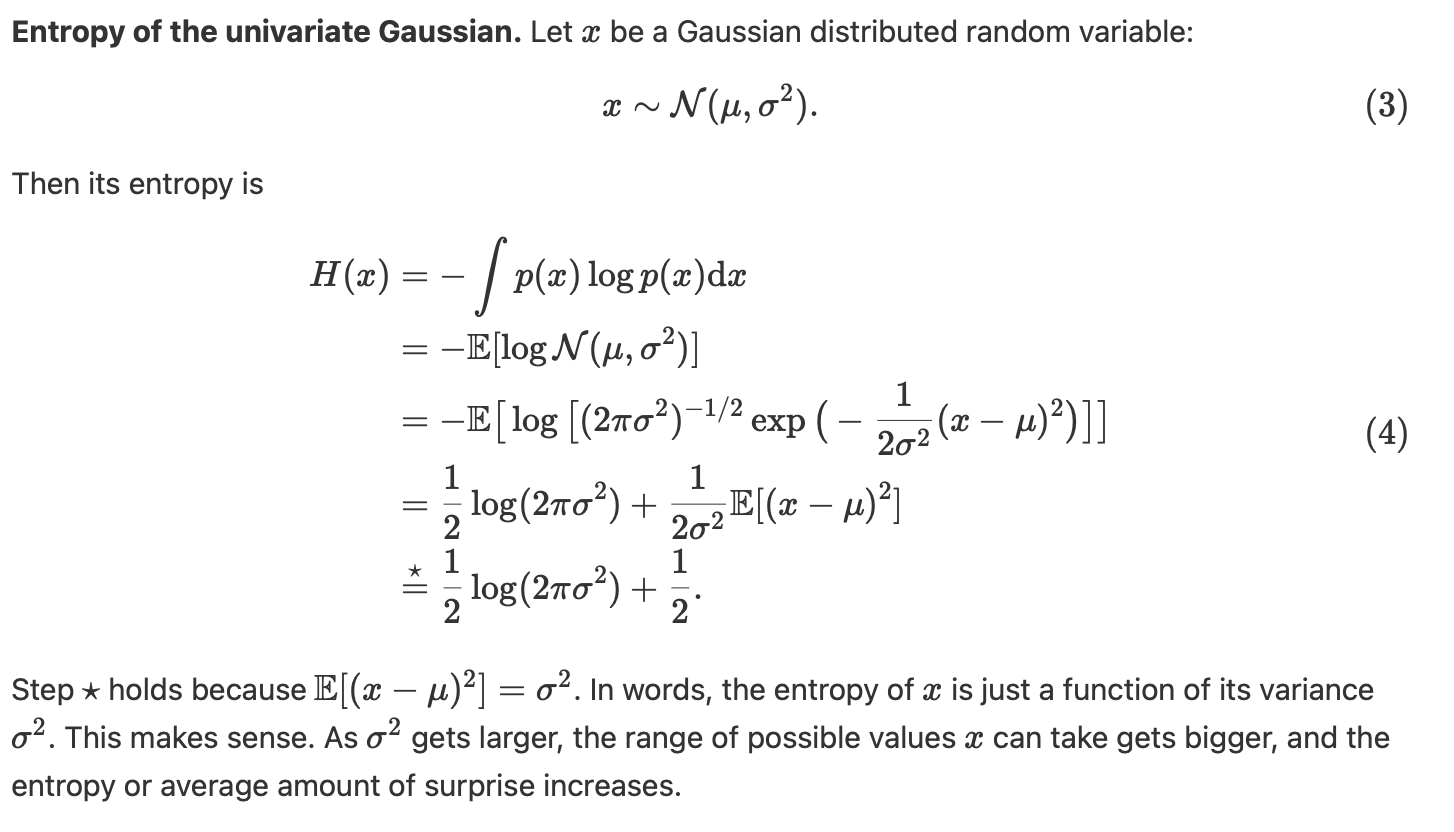

<i>The mathematical proof from [2] </i>

## References
[1] https://proofwiki.org/wiki/Differential_Entropy_of_Gaussian_Distribution <br>
[2] https://gregorygundersen.com/blog/2020/09/01/gaussian-entropy/ <br>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import differential_entropy


In [2]:
def create_gaussian_dist(mu,sigma, size = 1000):
    """
    Parameters
    ----------
    mu : float
        the mean of distribution
    sigma : float
        the standard deviation
    size : int, default= 1000
        the size of distribution

    Returns
    -------
    arr : an array
        a gaussian distributed array
    """
    arr = []
    for i in range(size):
        ele = random.gauss(mu, sigma)
        arr.append(ele)
        
    return arr

In [3]:
X = create_gaussian_dist(0.2, 0.5, 1000)
Y = create_gaussian_dist(0.5, 0.6, 1000)

H_X = differential_entropy(X, base = 2)
H_Y = differential_entropy(Y, base = 2 )

## Experiment 1: Negatif entropy in the gaussian distribution

If the variance is very small, the entropy of a gaussian distribution may become negative.

$$\color{#e74c3c}{\large Variance = \sigma^2 <\dfrac{1}{2 \pi e}}$$


In [4]:
random.seed(10)
sigma = np.sqrt(1/(2*np.pi*np.e))

X = create_gaussian_dist(0, sigma-0.02, 1000) # a random gaussian distribution with 0 mean and (sigma-0.01) std  
H_X = differential_entropy(X, base = 2)  # calculating entropy

print('The entropy of a gaussian distribution X : {0:.10f}'.format(H_X))

The entropy of a gaussian distribution X : -0.1242066661


## Experiment 2: Effect of the variance on the entropy of a gaussian distribution

The entropy of a Gaussian variable only depends on its variance.

In [5]:
sigma_arr = np.arange(0.1,5, 0.01)
sigma_entropies=[]

for i in sigma_arr:
    random.seed(10)
    Y = create_gaussian_dist(0,i, 1000)
    H_Y = differential_entropy(Y, base = 2)
    sigma_entropies.append(H_Y)

data = pd.DataFrame( sigma_arr, columns = ["values"])
data['sigma_entropies'] = sigma_entropies

In [6]:
mean_arr = np.arange(0.1,5, 0.01)
mean_entropies=[]

for i in mean_arr:
    random.seed(10)
    Y = create_gaussian_dist(mean_arr,1, 1000)
    H_Y = differential_entropy(Y, base = 2)
    mean_entropies.append(H_Y)

data['mean_entropies'] = mean_entropies[0]

In [7]:
data.head(5)

,values,sigma_entropies,mean_entropies
0,0.10,-1.274576,2.047352
1,0.11,-1.137073,2.047352
2,0.12,-1.011542,2.047352
3,0.13,-0.896064,2.047352
4,0.14,-0.789149,2.047352


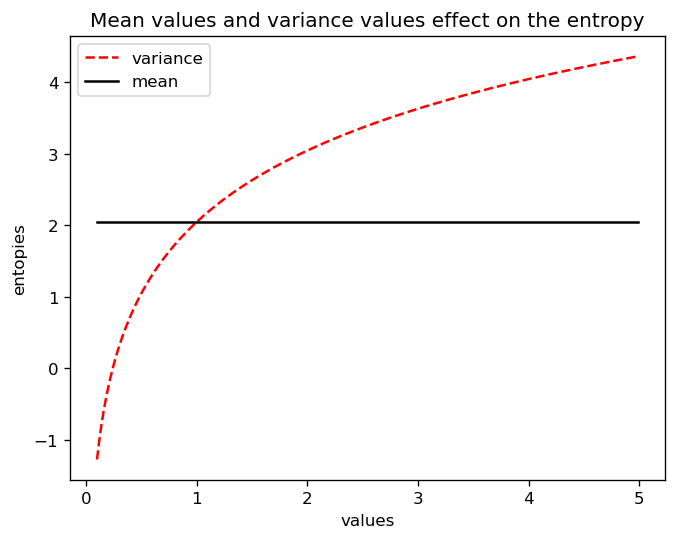

In [8]:
plt.figure(dpi=120)

plt.plot(data['values'], data['sigma_entropies'], linestyle = 'dashed', color= 'r')
plt.plot(data['values'], data['mean_entropies'], color='black')

plt.title("Mean values and variance values effect on the entropy")
plt.xlabel("values")
plt.ylabel("entopies")

plt.legend(["variance", "mean"])
